In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [3]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [4]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [5]:
df.shape

(56, 3)

In [6]:
# 75 : 25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df["Length2"],
                                                    df["Weight"],
                                                    test_size = 0.25,
                                                    random_state = 26)

x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형 회귀(Linear Regression)

- 피쳐를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘
- 장점
  - 계수들에 대한 해석이 간단
  - 학습과 예측 속도가 빠름
  - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음
- 단점
  - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
  - 이상치에 민감 

In [14]:
# 선형 회귀 모델 객체 생성
lr = LinearRegression()

In [16]:
# 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1177.52530583])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr객체에 저장되어 있음

In [21]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[36.37546989] -641.2481887482709


- 회귀식 : 36.37 * Length2 + (-641.24)
- coef_ 와 intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름
- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것
- 선형 회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습** 이라고 하고, KNN과 같이 모델 파라미터가 없이 훈련 데이터를 저장하는 훈련 방법을 **사례 기반 학습** 이라고 함

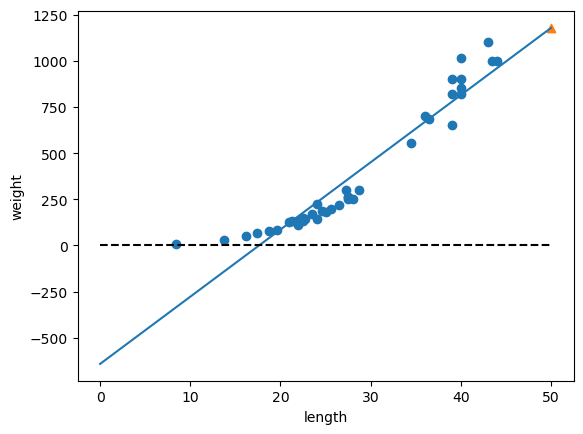

In [24]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)    # 훈련 데이터
plt.plot([0, 50], [lr.intercept_, 50 *  lr.coef_[0] + lr.intercept_])    # 회귀선
plt.scatter(50, 1177, marker = "^")    # 50cm 농어에 대한 예측값
plt.plot([0, 50], [0, 0], "k--")    # y가 0인 수평선

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [27]:
lr.score(x_test, y_test)

0.9243001069547975

In [29]:
pred = lr.predict(x_test)

In [31]:
mae = mean_absolute_error(y_test, pred)
mae

71.78585879340761

# 다항회귀

- 실제 농어의 무게는 일직선 이라기보다는 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측하는 것이 더 적합
- 길이를 제곱한 항을  추가하여 2차 방정식의 그래프 형태로 학습

In [34]:
# 길이 제곱 컬럼 추가
df["squared"] = df["Length2"] ** 2

In [36]:
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [38]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]],
                                                    df["Weight"],
                                                    test_size = 0.25,
                                                    random_state = 26)

In [40]:
x_train.shape

(42, 2)

In [42]:
# 모델 객체 생성
lr = LinearRegression()

In [44]:
# 모델 학습
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
# 결정계수
lr.score(x_test, y_test)

0.9538952913828949

In [48]:
pred = lr.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, pred)
mae

42.26328565822564

In [52]:
# 50cm 농어에 대한 예측
lr.predict([[50, 50**2]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1544.39934395])

In [54]:
print(lr.coef_, lr.intercept_)

[-22.99324165   1.02167853] 139.8651083674622


- 회귀식 : -22.99 * Length2 + 1.02 * squared + 139.86

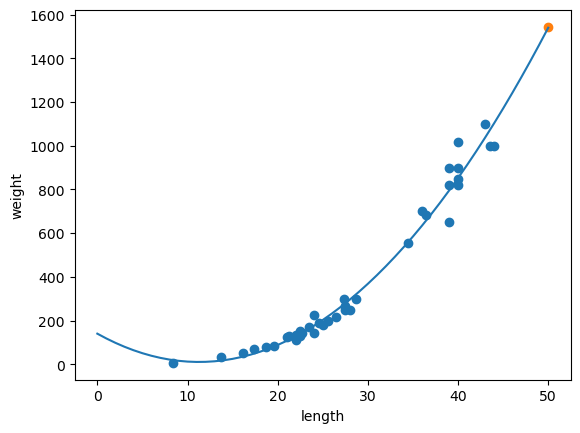

In [57]:
# 다항회귀 시각화
points = np.arange(51)

plt.scatter(x_train["Length2"], y_train)    # 훈련 데이터
plt.plot(points, -22.99 * points + (points ** 2) * 1.02 + 139.86)    # 회귀식
plt.scatter(50, 1544)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()